In [1]:
!pip install matplotlib

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install koreanize-matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import pandas as pd
import os

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"
# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/polls_questionset.parquet'

# 데이터 불러오기
questionset_df = pd.read_parquet(gcs_path, engine='pyarrow')
questionset_df.head()


,id,question_piece_id_list,opening_time,status,created_at,user_id
0,99817,"[998458, 998459, 998460, 998461, 998462, 99846...",2023-04-28 12:27:22,F,2023-04-28 12:27:23,849436
1,99830,"[998588, 998589, 998590, 998591, 998592, 99859...",2023-04-28 12:28:07,F,2023-04-28 12:28:07,849438
2,99840,"[998689, 998691, 998693, 998695, 998697, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,847375
3,99841,"[998688, 998690, 998692, 998694, 998696, 99869...",2023-04-28 12:28:38,F,2023-04-28 12:28:38,849446
4,99848,"[998768, 998769, 998770, 998771, 998772, 99877...",2023-04-28 12:28:57,F,2023-04-28 12:28:57,849477


In [5]:
questionset_df.shape

(158384, 6)

In [6]:
questionset_df.info

<bound method DataFrame.info of               id                             question_piece_id_list  \
0          99817  [998458, 998459, 998460, 998461, 998462, 99846...   
1          99830  [998588, 998589, 998590, 998591, 998592, 99859...   
2          99840  [998689, 998691, 998693, 998695, 998697, 99869...   
3          99841  [998688, 998690, 998692, 998694, 998696, 99869...   
4          99848  [998768, 998769, 998770, 998771, 998772, 99877...   
...          ...                                                ...   
158379  20838253  [208383291, 208383292, 208383293, 208383294, 2...   
158380  20838344  [208384201, 208384202, 208384203, 208384204, 2...   
158381  20838419  [208384951, 208384952, 208384953, 208384954, 2...   
158382  20838445  [208385211, 208385212, 208385213, 208385214, 2...   
158383  20838446  [208385221, 208385222, 208385223, 208385224, 2...   

              opening_time status          created_at  user_id  
0      2023-04-28 12:27:22      F 2023-04-28 12:27

In [7]:
questionset_df.dtypes

id                                 int64
question_piece_id_list            object
opening_time              datetime64[ns]
status                            object
created_at                datetime64[ns]
user_id                            int64
dtype: object

In [8]:
missing = questionset_df.isnull().sum()
missing

id                        0
question_piece_id_list    0
opening_time              0
status                    0
created_at                0
user_id                   0
dtype: int64

In [9]:
unique =questionset_df.nunique()

unique

id                        158384
question_piece_id_list    158384
opening_time              151839
status                         3
created_at                151940
user_id                     4972
dtype: int64

In [10]:
tats = questionset_df.describe(include='all').transpose()
tats

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,158384.0,NaN,NaN,NaN,7641273.830696,99817.0,1953393.25,6757335.0,12175103.25,20838446.0,5943689.973322
question_piece_id_list,158384,158384,"[998458, 998459, 998460, 998461, 998462, 99846...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opening_time,158384,NaN,NaN,NaN,2023-05-17 13:25:41.180416256,2023-04-28 12:27:22,2023-05-09 15:46:49.500000,2023-05-15 13:43:55.500000,2023-05-22 11:43:24.500000,2024-05-07 12:12:30,NaN
status,158384,3,F,153411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,158384,NaN,NaN,NaN,2023-05-17 12:43:12.170648832,2023-04-28 12:27:23,2023-05-09 14:58:05.500000,2023-05-15 13:04:46.500000,2023-05-22 11:04:03,2024-05-07 11:32:30,NaN
user_id,158384.0,NaN,NaN,NaN,1106751.980939,838023.0,884747.0,1117999.0,1261250.0,1583358.0,207861.209058


In [11]:
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing Ratio (%)': (missing / len(questionset_df)) * 100,
    'Unique Values': unique
})

missing_df.sort_values(by='Missing Ratio (%)', ascending=False)

,Missing Count,Missing Ratio (%),Unique Values
id,0,0.0,158384
question_piece_id_list,0,0.0,158384
opening_time,0,0.0,151839
status,0,0.0,3
created_at,0,0.0,151940
user_id,0,0.0,4972


In [12]:
import ast

# 1. 형 변환
questionset_df['opening_time'] = pd.to_datetime(questionset_df['opening_time'])
questionset_df['created_at']  = pd.to_datetime(questionset_df['created_at'])
if questionset_df['question_piece_id_list'].dtype == 'object':
    questionset_df['question_piece_id_list'] = questionset_df['question_piece_id_list'].apply(
        lambda x: x if isinstance(x, list) else ast.literal_eval(x)
    )

In [13]:
# question_piece_id_list가 문자열이면 리스트로 변환
if questionset_df['question_piece_id_list'].dtype == 'object':
    questionset_df['question_piece_id_list'] = questionset_df['question_piece_id_list'].apply(
        lambda x: x if isinstance(x, list) else ast.literal_eval(x)
    )

# 추천용 인터랙션 테이블 생성
interactions = (
    questionset_df[['user_id', 'question_piece_id_list']]
    .explode('question_piece_id_list')
    .rename(columns={'question_piece_id_list': 'question_id'})
)

# 중복 확인
duplicated_rows = interactions.duplicated().sum()
duplicated_examples = interactions[interactions.duplicated()].head()

duplicated_rows, duplicated_examples

(0,
 Empty DataFrame
 Columns: [user_id, question_id]
 Index: [])

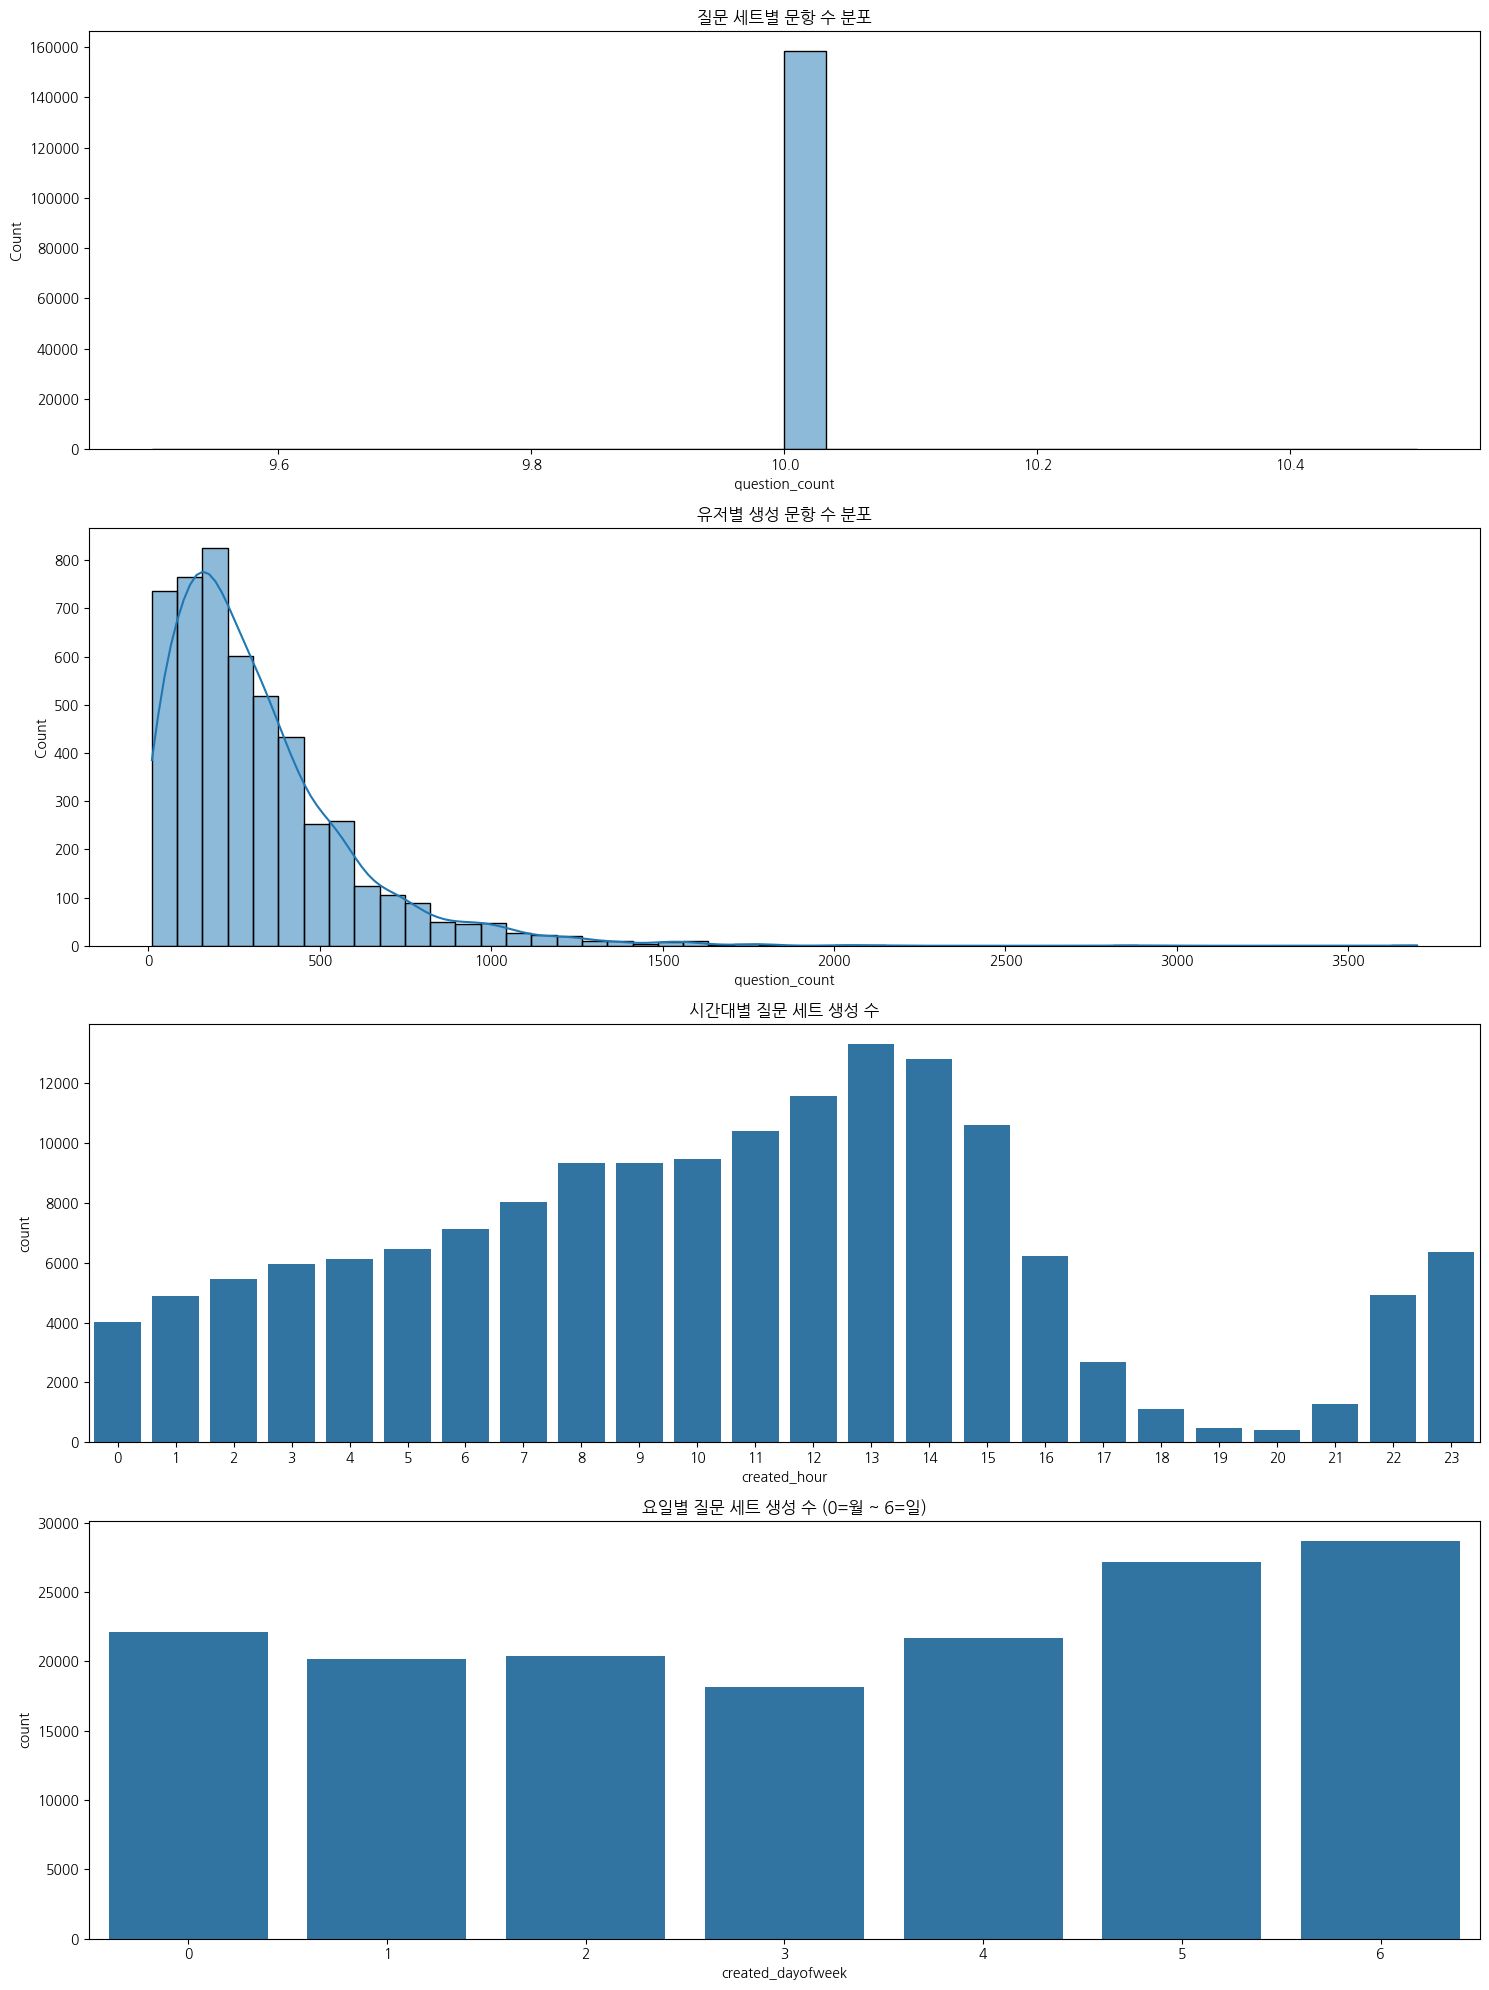

In [14]:
# 파생 변수 생성
questionset_df['question_count'] = questionset_df['question_piece_id_list'].apply(len)
questionset_df['created_hour'] = questionset_df['created_at'].dt.hour
questionset_df['created_dayofweek'] = questionset_df['created_at'].dt.dayofweek

# 유저별 생성 문항 수
user_question_df = questionset_df[['user_id', 'question_piece_id_list']].explode('question_piece_id_list')
user_question_count = user_question_df.groupby('user_id').size().reset_index(name='question_count')



# 시각화
plt.figure(figsize=(15, 20))

# 1. 질문 수 분포
plt.subplot(4, 1, 1)
sns.histplot(questionset_df['question_count'], bins=30, kde=True)
plt.title("질문 세트별 문항 수 분포")

# 2. 유저별 생성 문항 수
plt.subplot(4, 1, 2)
sns.histplot(user_question_count['question_count'], bins=50, kde=True)
plt.title("유저별 생성 문항 수 분포")

# 3. 시간대별 생성 패턴
plt.subplot(4, 1, 3)
sns.countplot(data=questionset_df, x='created_hour')
plt.title("시간대별 질문 세트 생성 수")

# 4. 요일별 생성 패턴
plt.subplot(4, 1, 4)
sns.countplot(data=questionset_df, x='created_dayofweek')
plt.title("요일별 질문 세트 생성 수 (0=월 ~ 6=일)")

plt.tight_layout()
plt.show()


In [15]:
# 리스트 변환
if questionset_df['question_piece_id_list'].dtype == 'object':
    questionset_df['question_piece_id_list'] = questionset_df['question_piece_id_list'].apply(
        lambda x: x if isinstance(x, list) else ast.literal_eval(x)
    )

# explode 후 컬럼명 정리
user_question_df = questionset_df[['user_id', 'question_piece_id_list']].explode('question_piece_id_list')
user_question_df.rename(columns={'question_piece_id_list': 'question_id'}, inplace=True)

# 사용자별 가장 많이 생성한 문항 집계
most_frequent_by_user = (
    user_question_df.groupby(['user_id', 'question_id'])
    .size()
    .reset_index(name='count')
    .sort_values(['user_id', 'count'], ascending=[True, False])
)

# 각 사용자별 최다 문항 1개씩 추출
most_frequent_top1 = most_frequent_by_user.groupby('user_id').head(1).reset_index(drop=True)

most_frequent_top1.head(10)

,user_id,question_id,count
0,838023,1167328,1
1,838466,3059298,1
2,838642,1023128,1
3,839357,1338618,1
4,840293,3154458,1
5,840473,3288518,1
6,840474,3119308,1
7,840512,3050518,1
8,840685,3046548,1
9,840902,3053278,1


In [16]:
user_per_question = (
    user_question_df
    .groupby('question_id')['user_id']
    .nunique()
    .reset_index(name='num_users')
    .sort_values(by='num_users', ascending=False)
)
user_per_question

,question_id,num_users
0,998458,1
1055924,101579661,1
1055898,101576600,1
1055897,101576598,1
1055896,101576595,1
...,...,...
527945,38822812,1
527944,38822809,1
527943,38822804,1
527942,38822800,1
